In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [102]:
def readData(fname='ZipDigits.train'):
    '''
     Input:
     fname: name of file containing N examples, each 
    with d attributes
     Output:
     X: N x d+1 numpy array
     y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0].replace(',','')))
            y.append(yval)
            xvals = [float(pixel.replace(',','')) for pixel in row[1:]]
            X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
    print(f'X shape: {X.shape}')
    print(f'y shape: {y.shape}')
    return X, y

In [103]:
Xdigitstrain, ydigitstrain = readData('ZipDigits.train.csv')
Ndigitstrain, pixels = Xdigitstrain.shape
assert(Ndigitstrain == ydigitstrain.shape[0])
Xdigitstest, ydigitstest = readData('ZipDigits.test.csv')
Ndigitstest, pixels = Xdigitstest.shape
assert(Ndigitstest == ydigitstest.shape[0])

X shape: (7291, 256)
y shape: (7291, 1)
X shape: (2007, 256)
y shape: (2007, 1)


In [104]:
def showKthImage(X, y, k):
    image = X[k, :].reshape((16, 16))
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'First digit is a {y[k, 0]}')
    plt.xlim(0, 15)
    plt.ylim(15, 0)
    plt.xticks(range(16))
    plt.yticks(range(16))
    plt.tight_layout()
    plt.show()

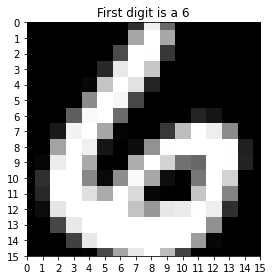

In [105]:
showKthImage(Xdigitstrain, ydigitstrain, 0)

In [106]:
np.mean(Xdigitstrain,axis=1).reshape(-1,1).shape

(7291, 1)

In [107]:
Xdigitstrain[7290:]

array([[-1.   , -1.   , -1.   , -1.   , -1.   , -0.108,  1.   ,  0.616,
        -0.867, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   ,  0.02 ,  1.   ,  1.   ,
         0.66 , -0.273, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -0.445,  1.   ,  1.   ,
         1.   ,  0.936, -0.504, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   ,  0.078,  1.   ,  1.   ,
         1.   ,  1.   ,  0.094, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   ,  0.009,  1.   ,  1.   ,
         1.   ,  1.   ,  0.658, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -0.061,  1.   ,  1.   ,
         1.   ,  1.   ,  0.53 , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   ,  0.166,  1.   ,  1.   ,
         1.   ,  1.   , -0.092, -1.   , -1.   , -1.   , -1.   , 

In [108]:
Ximgs[0].shape

(16, 16)

In [109]:
c = np.array([[1,2,3],[4,5,6]])
c

array([[1, 2, 3],
       [4, 5, 6]])

In [110]:
np.flip(c,axis=1)

array([[3, 2, 1],
       [6, 5, 4]])

In [111]:
np.mean(c)

3.5

In [122]:
N, d = Xdigitstrain.shape
Ximgs = [Xdigitstrain[n, :].reshape((16, 16)) for n in range(N)]

Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]

In [123]:
symmetries = np.array([- abs(np.mean(Ximgs[n] - Ximgs_flipped[n])) for n in range(N)])

In [124]:
- abs(np.mean(Ximgs[1] - Ximgs_flipped[1]))

-2.0816681711721685e-17

In [125]:
symmetries.shape

(7291,)

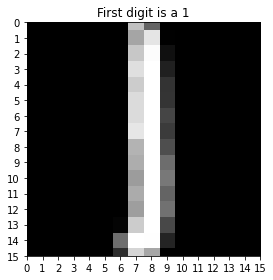

In [53]:
showKthImage(Xdigitstrain, ydigitstrain, 7)

In [67]:
intensity = computeIntensity(Xdigitstrain)

symmetry = computeSymmetry(Xdigitstrain)

dummy = np.ones((N, 1))

Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)

computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)


In [174]:
def computeIntensity(X):

    '''

    Input:

        X: a 2 dimensional N x 256 numpy array

           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit

           each pixel has an intensity value between -1 and 1

    Output:

        intensities: a 2 dimensional N x 1 numpy array

                     each row consists of a single value representing the 

                     average pixel intesity of the corresponding image

                     See LFD Example 3.1

    '''

    print('computing intensity feature')

    N, d = X.shape

    print(f'Input shape {N}, {d}')

    '''

    TODO: Compute the intensity feature for N data points

    '''
    intensities = np.mean(X,axis=1).reshape(-1,1)

    print(f'Output shape {intensities.shape}')

    return intensities





def computeSymmetry(X):

    '''

    Input:

        X: a 2 dimensional N x 256 numpy array

           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit

           each pixel has an intensity value between -1 and 1

    Output:

        symmetries: a 2 dimensional N x 1 numpy array

                     each row consists of a single value representing the 

                     "horizontal" symmetry of the 16 x 16 image about the vertical axis

                     See LFD Example 3.1

    '''

    print('computing symmetry feature')

    N, d = X.shape

    print(f'Input shape {N}, {d}')

    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]

    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]

    '''

    TODO: Compute the symmetry feature for N data points

    '''
    symmetries = np.array([-np.mean(abs(Ximgs[n] - Ximgs_flipped[n])) for n in range(N)])
    print('-->',symmetries.shape)
    symmetries = symmetries.reshape(N, 1)

    print(f'Output shape {symmetries.shape}')

    return symmetries





def computeAugmentedXWithFeatures(X):

    '''

    Input:

        X: a 2 dimensional N x 256 numpy array

           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit

           each pixel has an intensity value between -1 and 1

    Output:

        Xaug: a 2 dimensional N x 3 numpy array

              the augmented feature matrix

              the i-th row corresponds to the i-th row of X (and image represented by it)

              the 0-th column is the column of 1s

              the 1-st column is the column of average intensities

              the 2-nd column is the column of horizontal symmetries

    '''

    N, d = X.shape

    intensity = computeIntensity(X)

    symmetry = computeSymmetry(X)

    dummy = np.ones((N, 1))

    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)

    # print(Xaug)

    print (f'Shape of augmented feature matrix: {Xaug.shape}')

    return Xaug

In [175]:
np.ones((10, 1)).shape

(10, 1)

In [176]:
'''

Compute the augmented matrix with features

'''



print('Computing augmented training feature matrix')



Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)



Naugtrain, d = Xaugtrain.shape



print('Computing augmented test feature matrix')



Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)



Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
--> (7291,)
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
--> (2007,)
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)


In [177]:
'''

Create the dataset wih digits 1 and 5

'''



def indexDigits(y):

    '''

    Input:

        y: N x 1 2 dimensional numpy array; labels for handwritten digits

    Output:

        digit_idxs: a dictionary; the keys are digits 0 -- 9

                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k

    '''

    N = y.shape[0]

    digit_idxs = {}

    for n in range(N):

        digit = ydigitstrain[n, 0]

        if not digit in digit_idxs:

            digit_idxs[digit] = []

        digit_idxs[digit].append(n)

    return digit_idxs

In [178]:
'''

Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s

'''

digit_idxs_train = indexDigits(Xaugtrain)

X1train = Xaugtrain[digit_idxs_train[1], :]

N1train = X1train.shape[0]

print(f'number of 1s: {N1train}')

X5train = Xaugtrain[digit_idxs_train[5], :]

N5train = X5train.shape[0]

print(f'number of 5s: {N5train}')

Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]

ytrain = np.concatenate((np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)

Ntrain, d = Xtrain.shape

print(f'number of 1s and 5s: {Ntrain}')

print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')





digit_idxs_test = indexDigits(Xaugtest)

Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]

ytest = np.concatenate((np.ones((len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)

Ntest, d = Xtest.shape

print(f'number of 1s and 5s: {Ntest}')

print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s: 1005
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)
number of 1s and 5s: 428
Xtest shape: (428, 3), ytest shape: (428, 1)


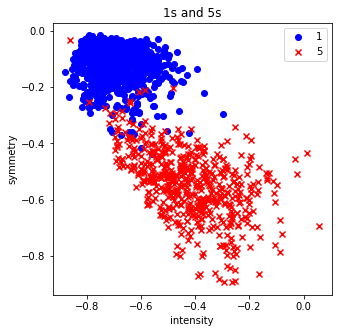

In [179]:
'''

Plot the training data

'''

fig, axs = plt.subplots(figsize=(5,5))

axs.scatter(X1train[:, 1], X1train[:, 2], marker='o', color='blue', label='1')

axs.scatter(X5train[:, 1], X5train[:, 2], marker='x', color='red', label = '5')

axs.set_xlabel('intensity')

axs.set_ylabel('symmetry')

# axs.set_xlim(-1, 0.2)

# axs.set_ylim(1, 2)

axs.set_title('1s and 5s')

axs.legend()

In [204]:
'''

Functions to compute the misclassification error

'''
def error(w, x, y, R=None):

    '''

    point-wise error measure for classification

    Input:

        w: a d x 1 2 dimensional numpy array

        x: a d x 1 2 dimensional numpy array

        y: a scalar value

        R: Risk weights; a dictionary 

           whose keys are tuples (y, yhat) with 

           value equal to the cost of predicting yhat when the label is y

    Output:

        error: misclassification error of hypothesis w on data point x with true label y

    '''

    '''

    TODO: compute the error made by hypothesis with weights w on data point x with label y

    '''

    return error





def E(w, X, y, R=None):

    '''

    point-wise error measure for classification

    Input:

        w: a d x 1 2 dimensional numpy array

        X: an N x d 2 dimensional numpy array

        y: an N x 1 2 dimensional numpy array

        R: Risk weights; a dictionary 

           whose keys are tuples (y, yhat) with 

           value equal to the cost of predicting yhat when the label is y

    Output:

        error: an N x 1 2 dimensional numpy array

               misclassification errors of hypothesis w on data points in X with true labels y

    '''

    # print(f'w shape {w.shape}, X shape {X.shape}, y shape {y.shape}')

    N = X.shape[0]

    '''

    TODO: compute the errors made by hypothesis with weights w on data points in X with true labels y

    '''
    pred = np.matmul(X, w)
    error = 1 / len(X) * np.sum(np.array(pred - y) ** 2)
#     error = np.array(pred - y)
#     print('error:->',error.shape)

    return error

In [208]:
def plotLinearSeparator(w, X, y, title=''):

    '''

    Plot data points a linear separator

    Input:

        w: a d x 1 2 dimensional numpy array

        X: an N x d 2 dimensional numpy array

        y: an N x 1 2 dimensional numpy array

        title: a string

    Output:

        error: misclassification error of hypothesis w on data points in X with true labels y

    '''

    '''

    Plot data points in X, y

    '''    

    plus1s = np.where(y == 1)[0]

    minus1s = np.where(y == -1)[0]

    Xplus1s = X[plus1s, :]

    Xminus1s = X[minus1s, :]

    fig, axs = plt.subplots(figsize=(5,5))

    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o', color='blue', label='1')

    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2], marker='x', color='red', label = '5')

    axs.set_xlabel('intensity')

    axs.set_ylabel('symmetry')

#     axs.set_xlim(-1, 0.2)

#     axs.set_ylim(1, 2)

    '''

    Plot separator

    '''

    pltxs = np.linspace(-1, 0.21)

    pltys = - (w[0] + w[1] * pltxs) / w[2]

    axs.plot(pltxs, pltys, color='green', label='separator')

    axs.set_title(title)

    axs.legend()

    plt.show()

In [209]:
'''

The Pocket algorithm (variant of the Perceptron Learning Algorithm)

'''    

def pocket(X, y, max_iters=1000, w_init=None):

    '''

    Implements the Pocket algorithm

    Input:

        X: A 2 dimensional N x d numpy array

           The i-th row X[i, :] contains features for the i-th example in the training set

           X[i, 0] = 1

           X[i, 1], ... X[i, d] have values of features

        y: A 2 dimensional N x d numpy array

           y[i, 0] is the label associated with the i-th example

        max_iters: an integer; maximum number of iterations of PLA

        w_init: A 2 dimensional d x 1 numpy array

                intended to set initial weights for PLA

    Output:

        w_best: a d x 1 2 dimensional numpy array

                weights with lowest error on the input training set X, y

    '''

    Eins = []

    ws = []



    Ein_best = np.infty

    w_best = 0



    w = np.zeros((d, 1))

    w = w + 0.0000001

    if not isinstance(w_init, type(None)):

        w = w_init



    for i in range(max_iters):

        Ein = E(w, X, y)

        Eins.append(Ein)

        ws.append(w)

        if Ein < Ein_best:

            Ein_best = Ein

            w_best = w

        '''

        TODO: Complete this implementation of the Pocket algorithm

        '''
        w = w + 0.0000001



    plt.scatter(range(max_iters), Eins)

    plt.xlabel('iteration')

    plt.ylabel('in sample error')

    plt.title('PLA')

    plt.tight_layout()

    plt.show()

    

    print(f'Ein_best {Ein_best}, \nw_best \n{w_best}')

    
    return w_best

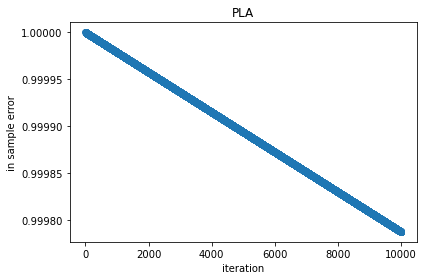

Ein_best 0.999787298672369, 
w_best 
[[0.001]
 [0.001]
 [0.001]]


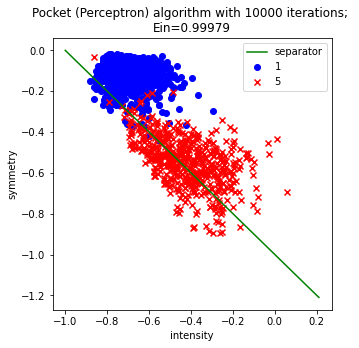

In [210]:
'''

Run the Pocket algorithm

'''

max_iters = 10000

w = pocket(Xtrain, ytrain, max_iters=max_iters)

Ein = np.round(E(w, Xtrain, ytrain),5)

plotLinearSeparator(w, Xtrain, ytrain, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')



In [ ]:
def linearRegression(X, y):

    '''

    Implements the one-step algorithm for Linear Regression (See LFD Section 3.2.1)

    Input:

        X: A 2 dimensional N x d numpy array

           The i-th row X[i, :] contains features for the i-th example in the training set

           X[i, 0] = 1

           X[i, 1], ... X[i, d] have values of features

        y: A 2 dimensional N x d numpy array

           y[i, 0] is the label associated with the i-th example

    Output:

        w: a d x 1 2 dimensional numpy array

           weights with lowest error on the input training set X, y

    '''

    '''

    TODO: Implement the one-step optimal algorithm for linear regression

    '''

    print(f'Ein {Ein}, \nw_lin \n{w_lin}')

    return w_lin



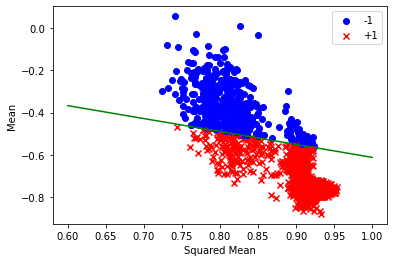

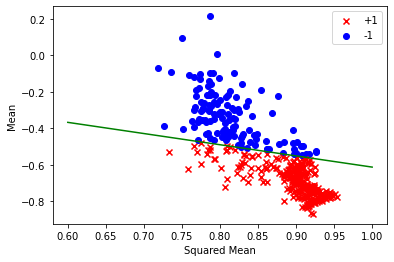

E_in of train data:  0.6021780909673285
E_test of test data:  0.660377358490566
Bounds of E_out: [0.660377358490566,0.619839774657368]


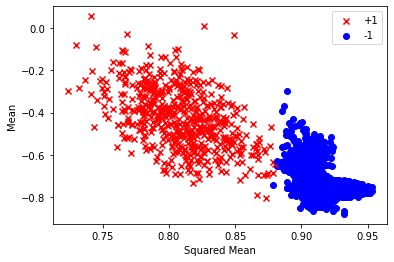

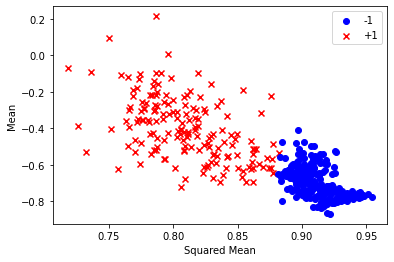

E_in of 3rd-order polynomial train data:  0.020499679692504803
E_test of 3rd-order polynomial test data:  5.951523286654417
Bounds of 3rd-order polynomial E_out: [5.951523286654417,0.07635082746647673]


'(e) Which model would you deliver to the USPS, the linear model with the 3-rd order polynomial\ntransform or the one without? Explain?\n\nAnswer: We definitely want to use the 3rd order polynomial transform for the USPS because\nthe 3rd order polynomial transform separates 1s and 5s better comparing to the linear model.\nIn other words, we can visualize the overlapping points better.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt


""" We will use (i) Linear regression for classification followed
by pocket algorithm.

Prompt: Use your classification algorithm of choice to find the best
separator using the training data only. For each example, use the two
features you computed in HW2 to as the inputs; and the output is +1
if the handwritten digit is 1 and -1 if the handwritten digit is 5.
Once you have found a separator using your classification algorithm:
"""
def load_data(file_path):
    trainingCSV = open(file_path, "r")
    trainingCSVLines = trainingCSV.readlines()

    onesAndFives = []
    for line in trainingCSVLines:
        if (int(line[0]) == 1 or int(line[0]) == 5):
            onesAndFives.append([float(value.strip()) for value in line.split(",")[:-1]])

    # print(onesAndFives)
    label1 = onesAndFives[0][0]
    img1 = onesAndFives[0][1:]
    img1 = np.array(img1).reshape(16, 16)

    label2 = onesAndFives[1][0]
    img2 = onesAndFives[1][1:]
    img2 = np.array(img2).reshape(16, 16)

    point_matrix = []

    for value in onesAndFives:
        data = np.array(np.zeros(3))
        data[0] = value[0]
        data[1] = np.mean(value[1:257])
        data[2] = np.mean(np.array(value[1:257] * np.array(value[1:257])))
        point_matrix.append(data)
    return np.array(point_matrix)

trainingCSV = load_data("ZipDigits.train.csv")
testingCSV = load_data("ZipDigits.test.csv")
#print(trainingCSV)

# Convert labels to -1 and 1
trainingCSV[:, 0] = [1 if x == 1 else -1 for x in trainingCSV[:, 0]]
testingCSV[:, 0] = [1 if x == 1 else -1 for x in testingCSV[:, 0]]


# We will use same functions that were implemented in HW2:
def PLA(x_array, yValues, weights=None, maxIterations = 10):
    # initialize all weights to 0, weights is a matrix of dimension 3
    if weights is None:
        weights = np.zeros(x_array.shape[1])
    # Run until the weights no longer updated (converge)
    for _ in range(maxIterations):
        errors = 0
        for index in range(x_array.shape[0]):
            outputFromWeights = np.dot(weights.T, x_array[index])
            predictedYValue = 1 if outputFromWeights >= 0 else -1
            if (predictedYValue != yValues[index]):
                errors += 1
                weights += yValues[index] * x_array[index]
        if (errors == 0):
            break
    return weights / weights[-1]


def linearRegression(xValues, yValues):
    xPseudoInverse = np.matmul(np.linalg.pinv(np.matmul(xValues.T, xValues)), xValues.T)
    weights = np.matmul(xPseudoInverse, yValues)
    return weights


def mean_square_error(predictions, true_values):  # E_in and E_out
    return 1 / len(predictions) * np.sum((predictions - true_values) ** 2)


#############################################################################################################################

# Pocket Algorithm
w_avg = linearRegression(trainingCSV[:, 1:], trainingCSV[:, 0])  # Initialize w_avg after running linear regression
w_t = np.copy(w_avg)  # set for w_0
for t in range(1):  # max iteration-random large number #trainingCSV.shape[0]

    # run PLA for each w(t+1) update
    w_t1 = PLA(trainingCSV[:, 1:], trainingCSV[:, 0], w_t)

    # Get E_in for each w(t+1) vs w_avg
    w_t1_predict = np.matmul(trainingCSV[:, 1:], w_t1)
    w_t1_err = mean_square_error(w_t1_predict, trainingCSV[:, 0])  # mean square error between predictions and true values

    w_avg_predict = np.matmul(trainingCSV[:, 1:], w_avg)
    w_avg_err = mean_square_error(w_avg_predict, trainingCSV[:, 0])

    # If E_in of w(t+1) lower than that of w_avg, replace w_avg
    if w_t1_err < w_avg_err:
        w_avg = np.copy(w_t1)
    w_t = w_t1

"""(a) Give separate plot of the training data (ZipDigits.train) and test data
(ZipDigits.test) which display the data points using two features you computed in
HW2, together with the separator
"""
train_predict = np.matmul(trainingCSV[:, 1:], w_avg)
train_predict = [1 if v > 0 else -1 for v in train_predict]
test_predict = np.matmul(testingCSV[:, 1:], w_avg)
test_predict = [1 if v > 0 else -1 for v in test_predict]
# Train_set plot
for i in range(len(trainingCSV)):
    items = trainingCSV[i]
    if (train_predict[i] > 0):
        plt.scatter(items[2], items[1], color='red', marker="x", label='+1')
    else:
        plt.scatter(items[2], items[1], color='blue', marker="o", label='-1')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
pltxs = np.linspace(0.6, 1.0, len(train_predict))
pltys = - ( w_avg[1] * pltxs) / w_avg[0]
plt.plot(pltxs, pltys, '-', color='green', label='separator')
plt.xlabel("Squared Mean")
plt.ylabel("Mean")
plt.show()


# Test_set plot
for i in range(len(testingCSV)):
    items = testingCSV[i]
    if (test_predict[i] > 0):
        plt.scatter(items[2], items[1], color='red', marker="x", label='+1')
    else:
        plt.scatter(items[2], items[1], color='blue', marker="o", label='-1')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
pltxs = np.linspace(0.6, 1.0, len(test_predict))
pltys = - ( w_avg[1] * pltxs) / w_avg[0]
plt.plot(pltxs, pltys, '-', color='green', label='separator')
plt.xlabel("Squared Mean")
plt.ylabel("Mean")
plt.show()



""" (b) Compute E_in on your training data (ZipDigits.train) and E_test, the error
of your separator on the test data (ZipDigits.test).
"""
E_in = mean_square_error(train_predict, trainingCSV[:, 0])  # in-sample error (train-set error)
E_test = mean_square_error(test_predict, testingCSV[:, 0])

print("E_in of train data: ", E_in)
print("E_test of test data: ", E_test)

"""(c) Obtain a bound on the true out-of-sample error (E_out). You should get
two bounds, one based on E_in and another based on E_test. Use a tolerance of
theta = 0.05. Which is the better bound?
"""
E_out_lower = E_test
theta = 0.05
N = len(trainingCSV)
M = len(testingCSV)
error_bar = np.sqrt(0.05 / N * np.log(2 * M / theta))
E_out_upper = E_in + error_bar
print("Bounds of E_out: [{},{}]".format(E_out_lower, E_out_upper))
# the upper bound is better because we don't know the entire (infinite) data to interpolate, so we want to keep the bound higher

"""(d) Repeat parts (a)-(c) using a 3-rd order polynomial transform

Answer:     First we need to transform both train and test set
            Original a, b
            Each set has a 3-deg polynomial features of 1, a, b, a^2, b^2, a^3, b^3, a*b
"""
# a1 + a2*x + a3*y + a4*x^2 + a5*y^2 + a6*x^3 + a7*y^3 + a8*x*y
transformed_train = np.zeros(
    (trainingCSV.shape[0], 8))  # empty array to store new 3rd-deg trainset; each column is a new feature
transformed_train[:, 0] = 1. #intercept a1
transformed_train[:, 1] = trainingCSV[:, 1] #a2
transformed_train[:, 2] = trainingCSV[:, 2] #a3
transformed_train[:, 3] = trainingCSV[:, 1] ** 2
transformed_train[:, 4] = trainingCSV[:, 2] ** 2
transformed_train[:, 5] = trainingCSV[:, 1] ** 3
transformed_train[:, 6] = trainingCSV[:, 2] ** 3
transformed_train[:, 7] = trainingCSV[:, 1] * trainingCSV[:, 2] #a8

transformed_test = np.zeros((testingCSV.shape[0], 8))
transformed_test[:, 0] = 1.
transformed_test[:, 1] = testingCSV[:, 1]
transformed_test[:, 2] = testingCSV[:, 2]
transformed_test[:, 3] = testingCSV[:, 1] ** 2
transformed_test[:, 4] = testingCSV[:, 2] ** 2
transformed_test[:, 5] = testingCSV[:, 1] ** 3
transformed_test[:, 6] = testingCSV[:, 2] ** 3
transformed_test[:, 7] = testingCSV[:, 1] * testingCSV[:, 2]

# Run Pocket Algorithm for transformed train set: use transformed features, keep labels as the same
w_avg = linearRegression(transformed_train[:, :], trainingCSV[:, 0])
w_t = w_avg
for t in range(1): #transformed_train.shape[0]
    w_t1 = PLA(transformed_train[:, :], trainingCSV[:, 0], w_t)

    w_t1_predict = np.matmul(transformed_train[:, :], w_t1)
    w_t1_err = mean_square_error(w_t1_predict, trainingCSV[:, 0])

    w_avg_predict = np.matmul(transformed_train[:, :], w_avg)
    w_avg_err = mean_square_error(w_avg_predict, trainingCSV[:, 0])

    if w_t1_err < w_avg_err:
        w_avg = w_t1
    w_t = w_t1


# plot train and test set
train_predict = np.matmul(transformed_train[:, :], w_avg)
train_predict = [1 if v >0 else -1 for v in train_predict]
test_predict = np.matmul(transformed_test[:, :], w_avg)

# train plot
for i in range(len(trainingCSV)):
    items = trainingCSV[i]
    if (train_predict[i] < 0):
        plt.scatter(items[2], items[1], color='red', marker="x", label='+1')
    else:
        plt.scatter(items[2], items[1], color='blue', marker="o", label='-1')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("Squared Mean")
plt.ylabel("Mean")
plt.show()


# test plot
for i in range(len(testingCSV)):
    items = testingCSV[i]
    if (test_predict[i] < 0):
        plt.scatter(items[2], items[1], color='red', marker="x", label='+1')
    else:
        plt.scatter(items[2], items[1], color='blue', marker="o", label='-1')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("Squared Mean")
plt.ylabel("Mean")
plt.show()

# Report E_in and E_out
E_in = mean_square_error(train_predict, trainingCSV[:, 0])
E_test = mean_square_error(test_predict, testingCSV[:, 0])
print("E_in of 3rd-order polynomial train data: ", E_in)
print("E_test of 3rd-order polynomial test data: ", E_test)
# Bounds for E_out
E_out_lower = E_test
theta = 0.05
N = len(trainingCSV)
M = len(testingCSV)
error_bar = np.sqrt(0.5 / N * np.log(2 * M / theta))
E_out_upper = E_in + error_bar
print("Bounds of 3rd-order polynomial E_out: [{},{}]".format(E_out_lower, E_out_upper))

"""(e) Which model would you deliver to the USPS, the linear model with the 3-rd order polynomial
transform or the one without? Explain?

Answer: We definitely want to use the 3rd order polynomial transform for the USPS because
the 3rd order polynomial transform separates 1s and 5s better comparing to the linear model.
In other words, we can visualize the overlapping points better.
"""
